# Laboratorium mechaniki kwantowej na komputerze – tajniki świata w skali mikro

**22. Toruński Festiwal Nauki i Sztuki**   
link: [www.festiwal.torun.pl](https://www.festiwal.torun.pl)  
22.04.2024

dr Tomasz Wasak  
Uniwersytet Mikołaja Kopernika w Toruniu  
Wydział Fizyki, Astronomii i Informatyki Stosowanej  
ul. Grudziądzka 5  
87-100 Toruń  
email: twasak@umk.pl

# Spis treści:
1. O liczbach losowych na komputerach
2. Czy cząstki zachowują się jak cząstki, czy jak fale?
3. Jak złapać fotony w pudełku? Kwantowe trajektorie
4. Czy gaz w naczyniu, po pewnym czasie, może się znaleźć tylko po jednej stronie?

### Opis
Zjawiska świata w skali pojedynczych cząstek bardzo różnią się od tego, co znamy z naszego życia codziennego. Na przykład atom może zachowywać się jak fala. Takie prawa natury, opisywane przez mechanikę kwantową, odkrywają fizycy badający przyrodę w swoich laboratoriach, w których przeprowadzają drobiazgowo przygotowane eksperymenty. Na warsztatach komputerowych podejdziemy do mechaniki kwantowej z innej strony. Przeprowadzimy eksperymenty na komputerze, a więc symulacje doświadczeń z laboratorium, które pokażą nam, dlaczego nasza intuicja z życia codziennego może mieć trudność w zrozumieniu zjawisk w skali mikro. Zapoznamy się z liczbami losowymi, które są bardzo ważne w mechanice kwantowej. Przyjrzymy się, w jaki sposób jeden atom oddziałuje z jedną cząstką światła, nazywaną fotonem, i jak wyglądają trajektorie kwantowe. Poruszymy również zagadnienie interferencji kwantowej, a więc zbadamy, w jaki sposób objawia się falowa natura cząstek.

### Instrukcja obsługi

Każdą komórkę można kliknąć i nacisnąc przycisk "**Run**" albo kombinacje klawiszy ``**Shift**+**Enter**''.  
Uruchomiony zostanie program, który po zakończeniu działania przedstawi jakiś wynik.

**Uwaga!**  
Jeśli w jakieś komórce jest napis:
```python
##--------------------------------------
## ALGORYTM
##--------------------------------------
```
to:
1. Przed tym napisem, można modyfikować liczby zgodnie ze wskazówkami.
2. Po tym napisie lepiej nic nie zmieniać... (ale można!).

# 1. O liczbach losowych na komputerach

Komputery nie tylko pozwoliły na dokładne obliczenia i symulacje trudnych numerycznie zagadnień, lecz dały dostęp do analizy zjawisk, które rządzą się rachunkiem prawdopodobieństwa. U podstaw mechaniki kwantowej leżą zjawiska, które oparte są o zjawiska losowe. Aby zrozumieć prawa przyrody, którę opisują nasz świat na poziomie pojedynczych atomów, musimy zrozumieć zjawiska losowe.

Sprawdźmy najpierw jednak, jak można na komputerze generować i opisywać zjawiska losowe.

## Zero lub jeden?

Wyobraźmy sobie, że losujemy ciąg liczb losowych 0 lub 1.
Możemy rzucać monetą - jeśli wyjdzie orzeł, wpisujemy na kartce 0, jeśli reszkta, to wpisujemy 1.
Powtarzamy rzuty monetą wiele razy, a wynik (czyli albo 0 albo 1) zapisujemy jako ciąg liczb po przecinku.

Teraz komputery robią to za nas.  
Ustalmy najpierw ile chemy wygenerować liczb. Może 121?  
Na komputerze robimy to tak:

In [ ]:
rozmiar_probki = 100
# tyle chcemy wygenerować liczb losowych




##--------------------------------------
## ALGORYTM
##--------------------------------------

# Importujemy maszynkę do generowania liczb losowych w Pythonie, tj. moduł numpy
# jest też moduł scipy, ale dla prostoty wykorzystamy tutaj numpy
import numpy as np

# Obiekt, który generuje liczby losowe ma bardzo 'przyjazną' nazwę "random.default_rng".
# Ustawiamy tzw. "seed", który jest daną wejściową, na podstawie której generowane są liczby.
# Naszą maszynkę nazwiemy "generator", ale nazwa mogłąby być dowolna.

generator = np.random.default_rng()


# Losowanie liczb wykorzstuje funkcję "integers" naszej maszynki "generator"
# Losujemy z przedziału [low,high) tj. dolny przedział ("low") się zawiera, górny wyłączony
# Dlatego ustawiamy low=0, a high=2, bo high się nie losuje, a więc, przedział [0,2) = 0,1 bez 2.
probka = generator.integers(low=0, high=2, size=rozmiar_probki)

#
# Napiszmy te liczby
#

print(f"To jest ciąg {rozmiar_probki} zer lub jedynek.\nOto są nasze liczby losowe:\n")
print(probka)


#
# Rysujemy
#

# Potrzebujemy modułu do rysowania
import matplotlib.pyplot as plt
plt.title("Ile jest zer, a ile jedynek?", fontsize=16)
plt.hist(probka, bins=[0,0.45,0.55,1])
plt.xticks([0.2, 0.8], ['0', '1'], fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Liczba losowa", fontsize=16)
plt.ylabel("Liczba zer lub jedynek", fontsize=16)
plt.show()

## Ciekawostka: Pewna uniwersalność w fizyce - rozkład Gaussowski (normalny)

Zobaczmy, co się stanie, jeżeli wylosujemy $N$ liczb losowych 0 lub 1 i je dodamy.  
Matematycznie zapisujemy to tak:
$$X = x_1 + x_2 + x_3 + x_4 + \ldots + x_N. $$
Każda z tych liczb $x_n$, gdzie pod $n$ możemy podstawić $n=1,2,3,\ldots,N$, może być równa albo 1 albo 0.

Taka suma liczb losowych, czyli $X$, też jest liczbą losową!  

Ale ma pewne uniwersalne właściwości.

In [ ]:
N = 100
# Wpisz, ile chcesz dodać liczb losowych. Może 100? Spróļuj 10 albo 1000



##--------------------------------------
## ALGORYTM
##--------------------------------------

# generujemy ciąg N liczb losowych 0 lub 1
seq = generator.integers(low=0,high=2, size=N)
print("Wylosowaliśmy", N, "liczb losowych:\n", seq)
print("Suma wszystkich liczb = ", np.sum(seq))

Powtórzmy to sumowanie wiele, wiele razy...

I zapytajmy: ile razy wypadła nam dana liczba, np. 47, w tym całym eksperymencie?

In [ ]:
N_powtorzen = 10000
# ile razy chcesz powtórzyć losowanie i sumowanie? Może 10? Albo 100? Albo 1000? Albo 10000?


##--------------------------------------
## ALGORYTM
##--------------------------------------

Nbins = 20

dane = np.empty(shape=N_powtorzen)

# powtarzamy losowanie przy pomocy instrukcji for
for i in range(1, N_powtorzen):
  seq = generator.integers(low=0,high=2, size=N)
  dane[i] = np.sum(seq)


# zliczmy ile razy pojawiła się dana liczba X
plt.hist(dane[1:], bins=Nbins, density=False)
plt.xlabel(r"suma liczb, $X$")
plt.ylabel(r"Liczba zliczen")
plt.title(r"Ile razy wypadła dana liczba $X$?")
plt.xlim(N/2 - 5*0.5*np.sqrt(N), N/2 + 5*0.5*np.sqrt(N))
plt.show()


# Jaki to kształ?
# Rozkład gaussowski

def f(x, mean, sigma):
  return np.exp(-(x-mean)**2 / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)

# próbkujemy funkcję f(x), tj. tworzymy ciąg liczb (x1, f(x1)), (x2, f(x2)), ...
# a potem go narysujemy na wykresie
xs = np.linspace(N/2 - 4*0.5*np.sqrt(N), N/2 + 4*0.5*np.sqrt(N),140)
fs = f(xs, 0.5* N, 0.5*np.sqrt(N))


plt.hist(dane[1:], bins=Nbins, density=True, label="Symulacja")
plt.title("Jaki to kształt?")
plt.plot(xs, fs, color="red", label="Rozkład Gaussowski")
plt.xlabel(r"$X$")
plt.ylabel(r"Prawdopodobieństwo")
plt.xlim(N/2 - 5*0.5*np.sqrt(N), N/2 + 5*0.5*np.sqrt(N))
plt.legend()
plt.show()

# Błądzenie przypadkowe

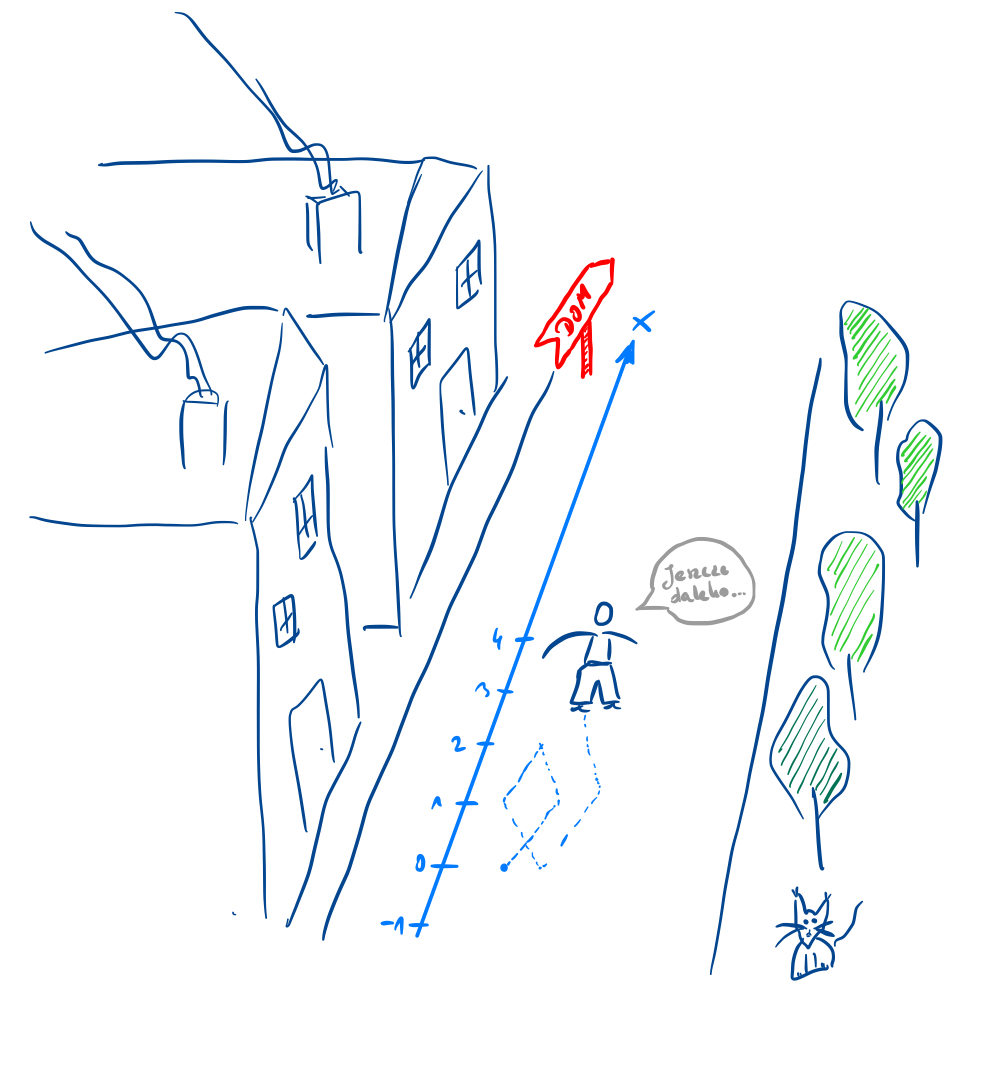

Wyobraźmy sobie studenta lub studentkę, który tak bardzo się cieszył, że zdał trudny egzamin podczas sesji, że postanowił uczcić swoje osiągnięcie. Wraca teraz do domu idąc ulicą, ale kroki z trudem stawia i nie bardzo wie, w którą stronę iść, ponieważ jest tak stasznie zmęczony. Czasem stawia więc krok do przodu, a czasem krok do tyłu...
To "czasem" to jest **losowość**...

Pytanie, jak daleko dojdzie?  
Czy coś można ogólnego powiedzieć o takim ruchu studenta?  
Jak naukowo podejść do tematu?  

Jak naukowiec lub naukowczyni może **zasymulować trajektorię** studenta?  
Można to zasymulować tak:  
Po każdym kroku rzucamy monetą.   
Jeśli orzeł - to krok do przodu. Jeśli reszka - to krok do tyłu.

Jak wyglądają takie trajektorie?  
Komputer losuje liczby za nas!

In [ ]:
ile_osob = 1         # obserwujemy konkretną liczbę osób (np. tutaj ile_osob = 1, tj. 1 osób)
n_krokow = 30         # każdą osobę obserwujemy przez n_kroków (tu np. 30 kroków)
dlugosc_kroku = 1.0   # długość kroku w metrach


##--------------------------------------
## ALGORYTM
##--------------------------------------

import numpy as np
import matplotlib.pyplot as plt

d = dlugosc_kroku

# generujemy dostans przebyty aż do n kroków
def trajektoria(n, d):
  kroki = generator.integers(low=0, high=2, size=n)
  kroki = 2*kroki -1
  kroki = d*kroki

  return np.concatenate((np.array([0.,]), np.cumsum(kroki)))


#
# Symulujemy trajektorie na komputerze:
#
trajektorie_wiele_osob = [trajektoria(n_krokow, d) for n in range(ile_osob)]


#
# Rysujemy
#
import matplotlib.pyplot as plt

for i in range(ile_osob):
  plt.plot(trajektorie_wiele_osob[i], np.arange(n_krokow+1), ".-")
plt.xlabel("przebyty dystans [m]")
plt.ylabel("liczba wykonanych kroków, n")
plt.show()

Widzimy, że te osoby nie dochodzą bardzo daleko...

W nauce obserwujemy prawidłowości. Aby powiedzieć coś o prawidłowościach w zjawiskach, w których mamy do czynienia z losowymi zdarzeniami, potrzebujemy wielu powtórzeń eksperymentu.

Przejdźmy teraz do takiej sytuacji, w której mamy **wiele tysięcy takich osób** (tu 2000), które idą w ten sposób co student, ale niezależnie od siebie (nie chcemy przecież, aby się zderzyły).  

I zapytajmy, ile osób osiągnęło po $n$ krokach, tutaj 100, jakiś konkretny dystans.

In [ ]:
n_krokow = 100 # na jakim dystansie (ile kroków zrobiły) obserwujemy osoby?
ile_osob = 2000 # ile razy powtarzamy eksperyment?



##--------------------------------------
## ALGORYTM
##--------------------------------------

trajektorie_wiele_osob = [trajektoria(n_krokow, d) for n in range(ile_osob)]
trajektorie_wiele_osob = np.array(trajektorie_wiele_osob)

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
steps = 5
plt.hist(trajektorie_wiele_osob[::, steps], bins=np.arange(-40,40,0.5), align="left")
plt.xlabel("Przebyty dystans [m]")
plt.ylabel("liczba osób")
plt.title(f'Po {steps} krokach.')


plt.subplot(2, 2, 2)
steps = 25
plt.hist(trajektorie_wiele_osob[::, steps], bins=np.arange(-40,40,0.5), align="left")
plt.xlabel("Przebyty dystans [m]")
plt.ylabel("liczba osób")
plt.title(f'Po {steps} krokach.')

plt.subplot(2, 2, 3)
steps = 50
plt.hist(trajektorie_wiele_osob[::, steps], bins=np.arange(-40,40,0.5), align="left")
plt.xlabel("Przebyty dystans [m]")
plt.ylabel("liczba osób")
plt.title(f'Po {steps} krokach.')

plt.subplot(2, 2, 4)
steps = 100
plt.hist(trajektorie_wiele_osob[::, steps], bins=np.arange(-40,40,0.5), align="left")
plt.xlabel("Przebyty dystans [m]")
plt.ylabel("liczba osób")
plt.title(f'Po {steps} krokach.')

plt.tight_layout()
plt.show()

# 2. Czy cząstki zachowują się jak cząstki, czy jak fale?

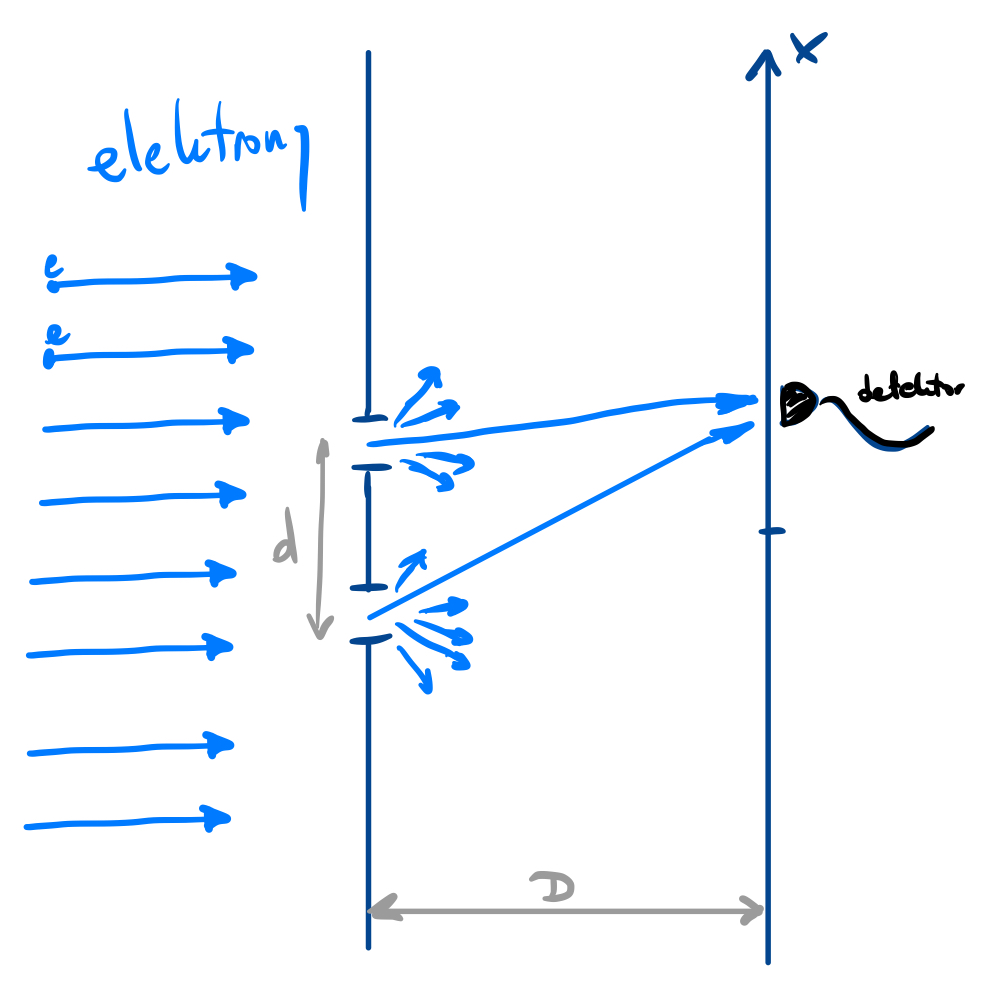

Załóżmy, że mamy wiązkę elektronów przechodzącą przez dwie szczeliny oddalone od siebie o odległość $d$.
Elektrony przechodzą przez szczeliny i docierają do ekranu, który znajduje się w odległości $D$ od szczelin.
Jeździmy teraz detektorem po ekranie i zliczamy - ile elektronów wpadło do detektora?
Potem powtarzamy doświadczenie w takich samych warunkach, zmieniając tylko pozycję detektora w inne położenie.
Pytanie, jak wygląda liczba zliczeń elektronów w zależności od położenia na dalekim ekranie.

Można to policzyć na komputerze!

In [ ]:
# uruchamiamy najpierw tę komórkę

##--------------------------------------
## ALGORYTM
##--------------------------------------

import numpy as np
import matplotlib.pyplot as plt

zdefiniowano_symulacjeQ = True

def symulacja_elektronow(Nelektronow, czy_gorna_otwarta, czy_dolna_otwarta):

    D = 40.0 # odległość ekranu od szczelin
    d = 1.0  # odległość pomiędzy szczelinami
    v = 20.0 # prędkość

    if czy_dolna_otwarta == czy_gorna_otwarta == "nie":
        print("Nie obserwujemy elektronów.")
        return

    if czy_gorna_otwarta == "tak":
        print("Górna szczelina otwarta.")
        czy_gorna_otwarta = True
    elif czy_gorna_otwarta == "nie":
        print("Górna szczelina zamknięta.")
        czy_gorna_otwarta = False
    else:
        print("Co zrobić ze szczeliną górną?")
        return

    if czy_dolna_otwarta == "tak":
        print("Dolna szczelina otwarta.")
        czy_dolna_otwarta = True
    elif czy_dolna_otwarta == "nie":
        print("Dolna szczelina zamknięta.")
        czy_dolna_otwarta = False
    else:
        print("Co zrobić ze szczeliną dolną?")
        return



    # Funkcja: prawdopodob(x, v, d, D, gorna_otwarta, dolna_otwarta, sigma)
    # Zwraca: prawdopodobieństwo zliczenia detektora wokół x
    # Uwaga: jako funkcja x nie jest unormowana, a więc jest tylko proporcjonalna do prawdopodobieństwa
    #
    #
    # Zmienne:
    # x - pozycja na detektorze
    # v - prędkość elektronów
    # d - odległośc pomiędzy szczelinami
    # gorna_otwarta - True jeśli górna przegroda jest otwarta, False jeśli nie
    # dolna_otwarta - True jeśli dolna przegroda jest otwarta, False jeśli nie


    # górna szczelina
    def R_up(x, d, D):
      return np.sqrt((x-d/2)**2+D**2)

    # dolna szczelina
    def R_down(x, d, D):
      return np.sqrt((x+d/2)**2+D**2)

    # amplituda przejścia z górnej szczeliny
    def A_up(x, v, d, D, sigma):
      R = R_up(x, d, D)
      return np.exp(1.0j * v* R)/R * np.exp(-(x-d)**2/sigma**2)

    # amplituda przejścia z dolnej szczeliny
    def A_down(x, v, d, D, sigma):
      R = R_down(x, d, D)
      return np.exp(1.0j * v* R)/R * np.exp(-(x+d)**2/sigma**2)

    def A(x, v, d, D, gorna_otwarta, dolna_otwarta, sigma):
      return gorna_otwarta * A_up(x, v, d, D, sigma) + dolna_otwarta * A_down(x, v, d, D, sigma)

    def prawdopodob(x, v, d, D, gorna_otwarta, dolna_otwarta, sigma):
      return np.abs(A(x, v, d, D, gorna_otwarta, dolna_otwarta, sigma))**2



    Nm=1000
    L = 100
    xs = np.linspace(-L,L,Nm)
    sigma = 40.0 # kolimacja


    ps = [prawdopodob(x, v, d, D, czy_gorna_otwarta, czy_dolna_otwarta, sigma) for x in xs]

    Ps = ps/np.sum(ps)
    cPs = Ps.cumsum()

    from scipy.interpolate import interp1d

    # interpolujemy
    it_cPs = interp1d(xs, cPs, kind="cubic")
    #plt.plot(xs,cPs, ".", label="original")
    #plt.plot(xs,it_cPs(xs), label="interpolated")


    # odwracamy relację

    genPos = interp1d(cPs, xs, kind="cubic")

    # generujemy liczby losowe
    generator = np.random.default_rng()

    us = generator.uniform(0,1,size=Nelektronow)

    # generujemy zliczenia elektronow
    pos = genPos(us)

    zs = generator.uniform(0,1,size=Nelektronow)


    #
    # Rysujemy
    #
    plt.plot(pos,zs, ".")
    plt.xlim(-L,L)
    plt.title("Ekran")
    plt.xlabel("Pozycja detektora, x")
    plt.show()

    plt.hist(pos,bins=60)
    plt.title(r"Ile elektronów wpadło w pozycji $x$?")
    plt.xlabel("Pozycja detektora, x")
    plt.ylabel("Liczba zliczeń elektronów")
    plt.show()

In [ ]:
Nelektronow = 10   # ile elektronów? Może 10? Może 100? Może 1000? 10000?



czy_gorna_otwarta = "tak"  # Czy szczelina górna jest otwarta? "tak" lub "nie"
czy_dolna_otwarta = "tak" # Czy szczelina dolna jest otwarta? "tak" lub "nie"


##--------------------------------------
## ALGORYTM
##--------------------------------------
if zdefiniowano_symulacjeQ != True:
    print("Prosze uruchomić komórkę powyżej.")

if zdefiniowano_symulacjeQ == True:
    symulacja_elektronow(Nelektronow, czy_gorna_otwarta, czy_dolna_otwarta)

# 3. Jak złapać fotony w pudełku? Kwantowe trajektorie

Czy można złapać światło w próżni?  
Nie, ponieważ światło jest to fala elektromagnetyczna, która może się poruszać tylko z prędkością światła - i nie można jej zatrzymać.

Jednak o, co można zrobić, to światło uwięzić. Takie pułapki na światło, nazywa się **wnęką optyczną** albo wnęką rezonansową. Składa się ona z dwóch - lub więcej - luster, które odbijają światło. Dzięki temu można zrobić pudło (wnękę), która z każdej strony będzie odbijać światło, a w konsekwencji światło zostaje ograniczone w przestrzeni.

Światło we wnęce ma pewne natężenie, im większe natężenie, tym większa jest uwięziona energia fali elektromagnetycznej. Jeśli będziemy zmniejszać to natężenie, w pewnym momencie, w niskich temperaturach, ujawnią się prawa mechaniki kwantowej.

Okaże się wtedy, że światło ma "ziarnistą" strukturę - energię można zmieniać tylko w pewnych porcjach (**kwantach**) energii, a tej porcji nie można już bardziej rozdrobnić.

Te porcje energii nazywa się **fotonami**.
Przypomina to ziarnistą strukturę materii, która zbudowana jest z atomów, a więc fotony nazywa się cząstkami światła.

**Rysunek**  
Poniżej przedstawiono, jak można wyobrażać sobie taką wnękę z jednym fotonem.  
Opis:  
1. Pusta wnęka optyczna i dwa lustra.
2. Jeden foton - fala elektromagnetyczna, która odbijana jest od jednego i drugiego lustra.
3. Niedoskonałość lustra sprawia, że foton może uciec z wnęki (zjawisko losowe).
4. Fotony są też na zewnątrz wnęki w otoczeniu. Taki foton może przedostać się do wnęki i zostać w niej uwięziony.

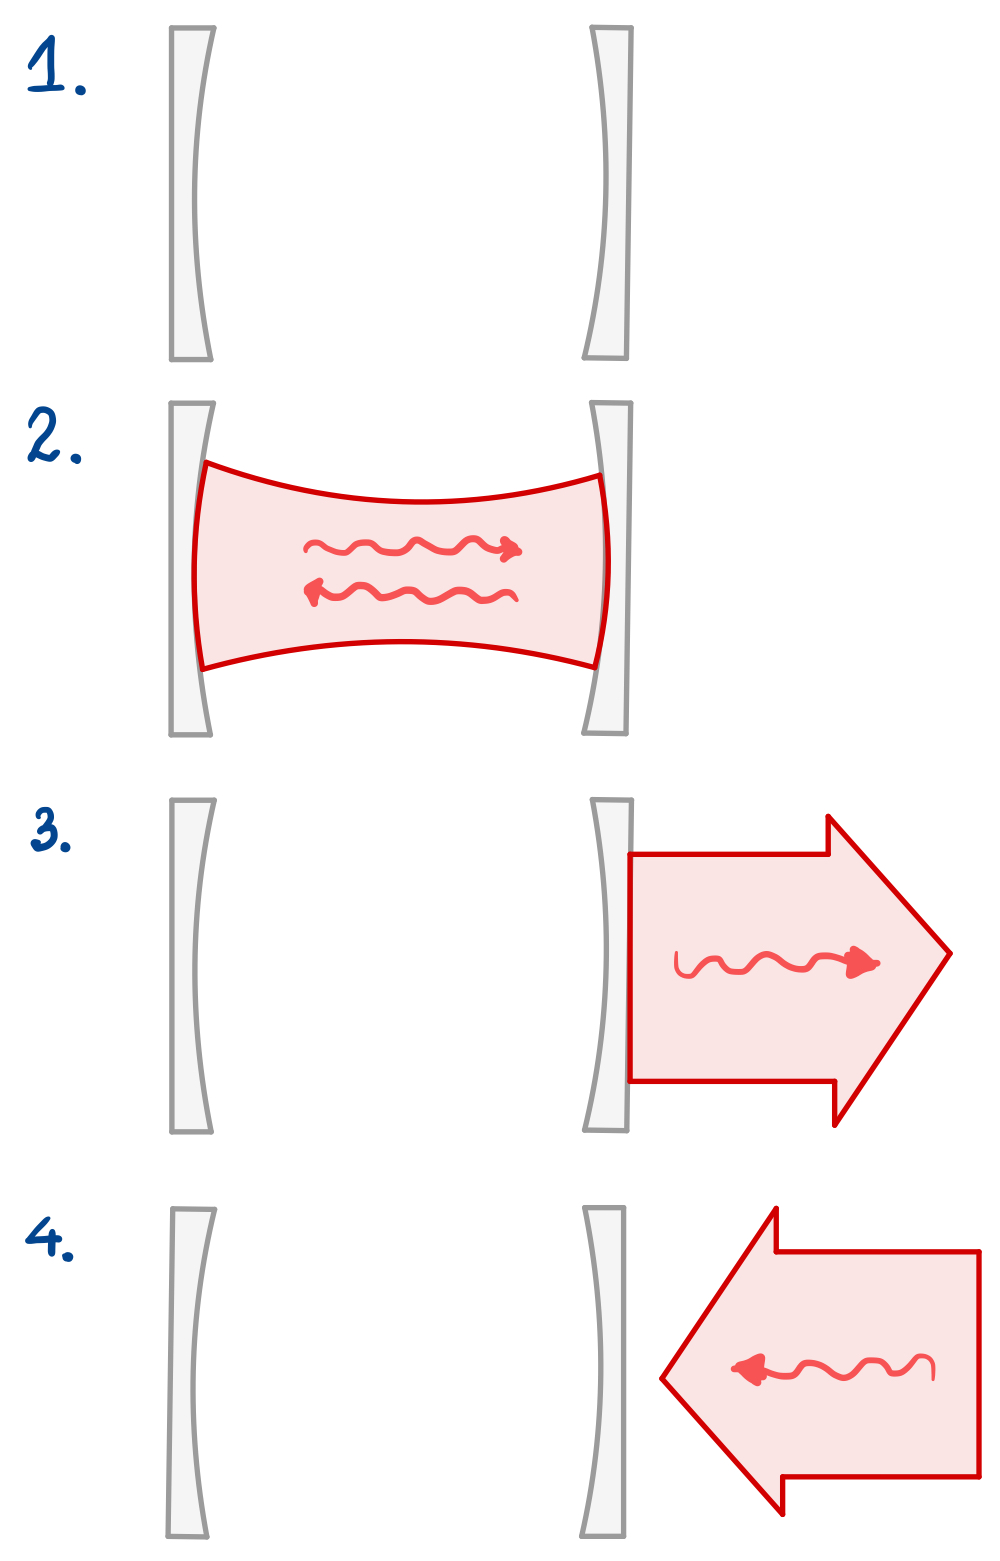

Zróbmy teraz eksperyment numeryczny.

Załóżmy, że mamy wnękę optyczną, w której uwięziony jest jeden foton. W otoczeniu wnęki jest bardzo mało fotonów, a więc istnieje szansa, że foton ucieknie. Jest również możliwość taka, że foton z otoczenia przeniknie do wnęki przez przezroczyste lustra. Te "szanse", to oznaka tego, że coś jest losowego w opisie zjawiska.

Sprawdźmy jak to opisać.  
Załóżmy, że na początku we wnęce jest tylko jeden foton.
Co z nim się będzie działo?


In [ ]:
# Ile jest na początku fotonów we wnęce?
liczba_fotonow = 1

# Ile jest fotonów na zewnątrz (uśredniona wartość)?
n_otoczenie = 0.1



##--------------------------------------
## ALGORYTM
##--------------------------------------
kappa = 1.5         # szybkość uciekania fotonów
N = 20             # liczba elementów bazy do rozważenia
nphoton = liczba_fotonow
nthermal = n_otoczenie

if liczba_fotonow >= N:
    print(f"Maksymalna liczba fotonów to {N-1}.")
    raise SystemExit("")

# Próbkujemy dynamikę w tych czasach:
import numpy as np
ts = np.linspace(0, 2.0, 100)


#
# instalujemy qutip - program do rozwiązywania równań mechaniki kwantowej opsiujący fotony we wnęce
#

try:
    first_run
except NameError:
    !pip install qutip
    first_run = False
else:
    pass

import matplotlib.pyplot as plt
import numpy as np
from qutip import basis, destroy, expect, mcsolve, mesolve, steadystate


# Operatory i stan
a = destroy(N)  # operator anihilacji fotonu we wnęce
H = a.dag() * a  # Hamiltonian fotonu we wnęce

# Stan początkowy z jakąś liczbą fotonów |nphoton>:
psi0 = basis(N, nphoton)

# lista operatorów kolapsu
c_ops = []

# operator kolapsu
c_ops.append(np.sqrt(kappa * (1 + nthermal)) * a)

# operator wzbudzenia
c_ops.append(np.sqrt(kappa * nthermal) * a.dag())

# Liczba trajektori po których chcemy dokonać uśrednienia
trajektorie = [1, 2, 10, 50, 100, 1024]
mc = [mcsolve(H, psi0, ts, c_ops, [a.dag() * a], traj) for traj in trajektorie]

# równanie master - opisujące jak w czasie zmienia się stan fotonów we wnęce
me = mesolve(H, psi0, ts, c_ops, [a.dag() * a])

# stan stacjonarny
final_state = steadystate(H, c_ops)

# średnia liczba fotonów we wnęce <n>
n_srednie = expect(a.dag() * a, final_state)

#
# Rysujemy
#

plt.figure(figsize=(10,10))
ymax = max(nphoton+1,nthermal+1)

for idx, ntrajs in enumerate(trajektorie):
  plt.subplot(len(trajektorie), 1, idx+1)
  plt.step(ts, mc[idx].expect[0], "r-", label=f"Liczba trajektorii: {ntrajs}")
  plt.ylim(0, 1.1*ymax)
  plt.xlim(0, ts[-1])
  plt.plot(ts, me.expect[0], "k-")
  #plt.axhline(y=n_srednie, color="b", linestyle="dotted")
  plt.xlabel("Czas")
  plt.ylabel("Liczba fotonów")
  plt.legend()

plt.show()

# 4. Czy gaz w naczyniu, po pewnym czasie, może się znaleźć tylko po jednej stronie?

**Klasyczna fizyka**  
Wyobraźmy sobie, że mamy dwa naczynia, które są ze sobą połączone małą rurką. Rurka ma małą zastawkę, która blokuje przepływ gazu pomiędzy naczyniami. Początkowo tylko jedno naczynie jest wypełnione gazem, a drugie jest puste.
Wyciągam zapadkę, która odblokowuje przepływ gazu z jednego naczynia do drugiego.  
Co się wydarzy?

**Mechanika kwantowa**  
Wyobraźmy sobie, że w bardzo niskiej temperaturze, bliskiej 0 K, pułapkujemy bardzo rozrzedzony gaz kwantowy, składający się z atomów należących do rodzaju, który określa się bozonami. Obok tego gazu mamy drugą identyczną pułapkę, ale gaz nie może przepływać do drugiej pułapki, bo jest za daleko. W pewnym momencie zbliżamy pułapkę na dostatecznie bliską odległość od gazu.  
Co się wydarzy?

In [ ]:
Na = 20         # liczba atomów w układzie
tfin = 0.5*150.   # ostateczny czas; spróbujmy też tfin = 2*150

Et = 1.0        # Energia tunelowania
U = 0.05        # oddziaływanie atom-atom



##--------------------------------------
## ALGORYTM
##--------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from scipy import special
import scipy as sc



# maksymalny rzut momentu pędu w mapowaniu atom <-> momentu pęd
j = Na/2

# wektor jz = -J, -J+1, ..., J-1, J
js = np.arange(-j, j+1)

# Tworzymy siatkę (grid) czasowy
Nmt = 1*4000      # liczba punktów w czasie

# grid: ts = (0, dt, 2dt, ...)
ts = np.linspace(0, tfin, Nmt)

# krok czasowy
dt = ts[1]-ts[0]




##
## Skład:
##

# Cplus(j, jz)
# Cminus(j, jz)
# generateJx(j)
# generateJx_v2(j):


##
## Funkcje
##

# definicja funkcji C_{+/-}(j_z)
def Cplus(j, jz):
  return np.sqrt( j*(j+1) - jz*(jz + 1) )

def Cminus(j, jz):
  return np.sqrt( j*(j+1) - jz*(jz - 1) )


##
## Generowanie macierzy <j_z|J_x|j_z'> dla zadanej liczby atomów N_A = Na
##

#
# Generowanie macierzy Jx
#
def generateJx(j):
  js = np.arange(-j, j+1)
  Cpluss = Cplus(j, js)
  CplusMat = np.diag(Cpluss[:-1], k=-1)
  return (CplusMat + CplusMat.T)/2

#
# Generowanie macierzy of Jy
#
def generateJy(j):
  js = np.arange(-j, j+1)
  Cpluss = Cplus(j, js)
  CplusMat = np.diag(Cpluss[:-1], k=-1)
  return (CplusMat - CplusMat.T)/(2.0j)

#
# Generowanie macierzy of Jz
#
def generateJz(j):
  js = np.arange(-j, j+1)
  res = np.diag(js)
  return res


##
## Generowanie C_m(t)
##

# Runge Rutta RK4 z krokiem h
# Cin to dane wejściowe

def RKstep(Cin, h):
  def F(y):
    return (-1j)*Heff@(y.T)

  k1 = F(Cin)
  k2 = F(Cin + h*k1/2)
  k3 = F(Cin + h*k2/2)
  k4 = F(Cin + h*k3)
  return Cin + (h/6)*(k1 + 2*k2 + 2*k3 + k4)


# Algorytm do ewolucji funkcji falowej aż do czasu t:
def evolve(Nmt, Na, psi_init):
  psis = np.empty(shape=(Nmt, Na+1), dtype=complex)
  psis[0] = psi_init
  for i in range(len(ts)-1):
    psis[i+1] = RKstep(psis[i], dt)
  return psis



# Generujemy macierz Jx
Jxs = generateJx(j)
Jys = generateJy(j)
Jzs = generateJz(j)

# Hamiltonian opisujący tunelowanie
H_J = -Et*Jxs
H_JL = 0.5*U*( np.diag(js**2) )
Heff = H_J + H_JL



##
## początkowa funkcja falowa w t=0
##

# #1: stan koherentny state
psi_init_coh = np.empty(shape=(Na+1), dtype=complex)
psi_init_coh[::] = (1/2**(Na/2)) * np.sqrt(sc.special.binom(Na, js+Na/2))

# #2: wszystko w jednym oczku pułapki, tylko jz = +N_A/2 jest zapełnione
psi_init_imb = np.empty(shape=(Na+1), dtype=complex)
psi_init_imb[::] = 0
psi_init_imb[-1] = 1


##
## Wybierz funkcję falową:
##
#psi_init = psi_init_coh
psi_init = psi_init_imb


# sprawzdzamy normalizację <psi|psi> = 1
#psi_init.conj() @ psi_init

# Ewoluujemy!
psis = evolve(Nmt, Na, psi_init)

# Obliczmy ile jaka jest średnia różnica liczby atomów w każdej studni: <J_z(t)>

mean_Jz = [psis[n].conj() @ (Jzs @ psis[n]) for n in np.arange(len(ts))]


# Narysujmy to <J_z(t)>
plt.plot(ts, Na/2+np.real(mean_Jz), "-")
plt.xlabel("Czas t")
plt.ylabel(r"$N_a(t) $")
plt.title(r"Oscylacje Rabiego")
plt.show()

# Podziękowania

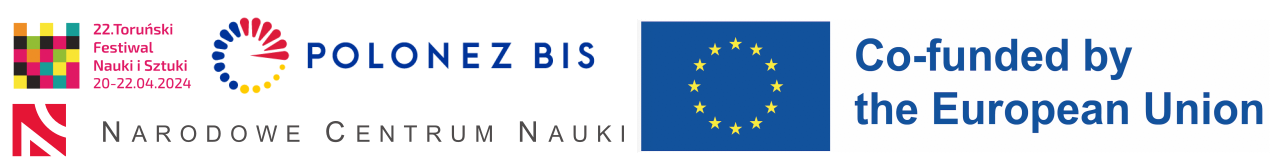